#Question 1 - Homework 02

## Some Helper Functions

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def disp_img(img, img_title = ""):
  fig, ax = plt.subplots()
  ax.imshow(img, cmap='gray')
  ax.set_title(img_title)
  ax.axis('off')
  # fig.show()

def disp_1x2(img1, img1_title, img2, img2_title):
  fig, ax = plt.subplots(1, 2)
  ax[0].imshow(img1, cmap='gray')
  ax[0].set_title(img1_title)
  ax[0].axis('off')
  ax[1].imshow(img2, cmap='gray')
  ax[1].set_title(img2_title)
  ax[1].axis('off')
  # fig.show()

def disp_nxm(images, n, m):
  fig, ax = plt.subplots(n, m)
  img_cnt = 0

  for img in images:
    row = int(img_cnt / m)
    col = int(img_cnt % m)
    ax[row, col].imshow(img, cmap='gray')
    ax[row, col].axis('off')
    img_cnt=img_cnt+1

  # fig.show()

def hist_set(data_set, plt_title=""):
  fig, ax = plt.subplots()
  ax.hist(data_set, bins=2, edgecolor="white")
  ax.set_title(plt_title)
  # plt.show()

def hist_nxm(sets, titles, n, m):
  fig, ax = plt.subplots(n, m)
  set_cnt = 0

  for set_data in sets:
    if n > 1:
      row = int(set_cnt / m)
      col = int(set_cnt % m)
      ax[row, col].hist(set_data, bins=2, edgecolor="white")
      ax[row, col].set_title(titles[set_cnt])
    else:
      ax[set_cnt].hist(set_data, bins=2, edgecolor="white")
      ax[set_cnt].set_title(titles[set_cnt])
    set_cnt=set_cnt+1

  fig.set_figwidth(m * 5)
  # fig.show()

def plot_accuracy(history):
  fig, ax = plt.subplots()
  # Plot the training accuracy
  sns.set_style("darkgrid")
  ax.plot(history.history['accuracy'])
  ax.plot(history.history['loss'])
  ax.set_title('Model Train Accuracy')
  ax.set_ylabel('Accuracy')
  ax.set_xlabel('Epoch')
  ax.legend(['Accuracy', 'Loss'], loc='upper left')

  fig, ax = plt.subplots()
  # Plot the validation accuracy
  ax.plot(history.history['val_accuracy'])
  ax.set_title('Model Validation Accuracy')
  ax.set_ylabel('Accuracy')
  ax.set_xlabel('Epoch')
  ax.legend(['Accuracy'], loc='upper left')
  # plt.show()

def score_table(model, test_set, test_label):
  score = model.evaluate(test_set, test_label, verbose='0')
  df = pd.DataFrame({'Test Score': [score[0]], 'Test Accuracy': [score[1]]})
  print('\n\n', df, '\n\n')
  return score[1]

def plot_roc_curve(y_true, y_pred_probs):
  # Compute false positive rate (fpr), true positive rate (tpr), and thresholds
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

  # Compute the AUC score
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  fig, ax = plt.subplots()
  ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  ax.set_xlim([0.0, 1.0])
  ax.set_ylim([0.0, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('Receiver Operating Characteristic (ROC) Curve')
  ax.legend(loc='lower right')
  # plt.show()

def plot_precision_recall_curve(y_true, y_pred_probs):
  # Compute precision-recall curve
  precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
    
  # Plot precision-recall curve
  fig, ax = plt.subplots()
  ax.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
  ax.set_xlabel('Recall')
  ax.set_ylabel('Precision')
  ax.set_title('Precision-Recall Curve')
  ax.legend(loc='best')
  # plt.show()

def plot_XY_marker(X, Y, title, ylabel, xlabel):
  fig, ax = plt.subplots()
  # Plot the training accuracy
  ax.plot(X, Y, marker='o')
  ax.set_title(title)
  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlabel)


## Load dataset from drive

In [2]:
# mounting google drive
# from google.colab import drive
# drive.mount('/content/drive')

# path to datasets
AD_DS_PATH = 'C:/Users/izsam/Desktop/HW02/dataset/AD'
MCI_DS_PATH = 'C:/Users/izsam/Desktop/HW02/dataset/MCI'

In [3]:
from os import listdir
from os.path import isfile, join
from matplotlib.image import imread
import numpy as np

# returns a numpy array of images inside dir_path
def get_all_samples(dir_path):
  files = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]
  samples = [imread(join(dir_path, image_path)) for image_path in files]
  return np.array(samples)

In [4]:
#Load Samples from drive
# Label of 1 is assigned to AD samples and 0 to MCI

ad_samples = get_all_samples(AD_DS_PATH)
ad_labels = np.ones(len(ad_samples))

mci_samples = get_all_samples(MCI_DS_PATH)
mci_labels = np.zeros(len(mci_samples))

In [5]:
# building final dataset
samples = np.concatenate((ad_samples, mci_samples))
labels = np.concatenate((ad_labels, mci_labels))

## Min-Max Normalization
As indicated in homework we will normalize samples to speed up training process

We use Min-Max normalization here

In [6]:
samples_norm = samples.astype('float32') / 255

### Statistical distribution before augmentation

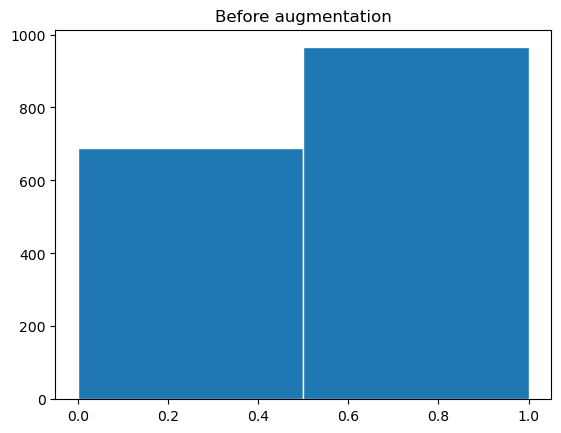

In [7]:
hist_set(labels, "Before augmentation")

## Augmentation

In [8]:
from scipy.ndimage import affine_transform
from scipy.ndimage import rotate
from scipy.ndimage import zoom

# functions to create new images
def horizontal_flip(image):
  return image[...,:,::-1]


def shear_image(image, shear_range):
  # Generate a random shear factor within the given range
  shear_factor = np.random.uniform(-shear_range, shear_range)

  # Define the transformation matrix for shear
  shear_matrix = np.array([[1, -shear_factor, 0],
                            [0, 1, 0],
                            [0, 0, 1]])

  # Apply the shear transformation using affine_transform
  sheared_image = affine_transform(image, shear_matrix)

  return sheared_image


def shift_image(image, shift_range):
  horizontal_shift = np.random.uniform(-shift_range[0], shift_range[0])
  vertical_shift = np.random.uniform(-shift_range[1], shift_range[1])

  # Define the transformation matrix for shift
  shift_matrix = np.array([[1, 0, horizontal_shift],
                            [0, 1, vertical_shift],
                            [0, 0, 1]])

  # Apply the shift transformation using affine_transform
  shifted_image = affine_transform(image, shift_matrix)

  return shifted_image


def rotate_image(image, angle_range):
  # Generate a random rotation angle within the given range
  rotation_angle = np.random.uniform(angle_range[0], angle_range[1])

  # Rotate the image using scipy's rotate function
  rotated_image = rotate(image, angle=rotation_angle, reshape=False)

  return rotated_image


def zoom_image(img, zoom_factor):
    h, w = img.shape[:2]

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_factor)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_factor)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

def resize_image(image, new_size):
  # Calculate the resize factor for each dimension
  resize_factor = (new_size[0] / image.shape[0], new_size[1] / image.shape[1])

  # Resize the image using scipy's zoom function
  resized_image = zoom(image, resize_factor)

  return resized_image



In [9]:
from IPython.display import clear_output

# Do augmentation such that sample size increases by factor of 5
samples_64x64 = np.array([resize_image(img, (64,64)) for img in samples_norm])
samples_aug = []
# samples_aug.shape
lables_aug = []
total_samples = len(samples_64x64)

for x in range(total_samples):
  if(x%10==0):
    clear_output()

  s = samples_64x64[x]
  l = labels[x]
  samples_aug.append(horizontal_flip(s))
  lables_aug.append(l)
  samples_aug.append(shear_image(s, 0.2))
  lables_aug.append(l)
  samples_aug.append(shift_image(s, (0.1,0.1)))
  lables_aug.append(l)
  samples_aug.append(rotate_image(s, (0, 15)))
  lables_aug.append(l)
  samples_aug.append(zoom_image(s,0.8))
  lables_aug.append(l)
  print(f"Augmented sample: {x+1} / {total_samples} \r\n")


samples_aug = np.array(samples_aug)
lables_aug = np.array(lables_aug)

Augmented sample: 1651 / 1654 

Augmented sample: 1652 / 1654 

Augmented sample: 1653 / 1654 

Augmented sample: 1654 / 1654 



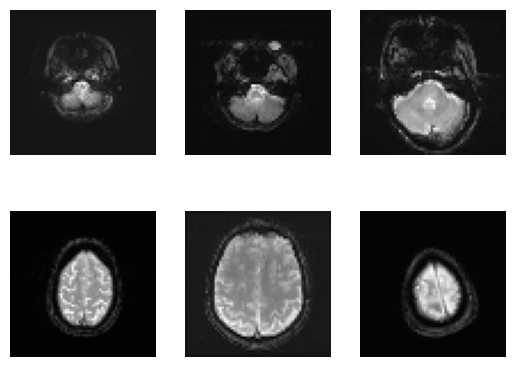

In [10]:
import random

sample_after_aug = []

for x in range(6):
  idx = random.randint(0, len(samples_aug) - 1)
  sample_after_aug.append(samples_aug[idx])

disp_nxm(sample_after_aug, 2, 3)


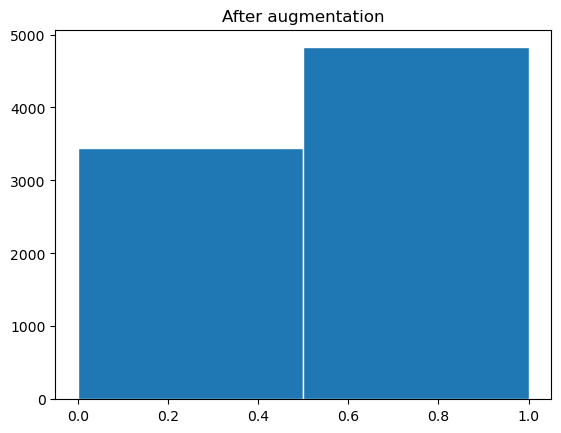

In [11]:
# Distribution after Augmentation
hist_set(lables_aug, "After augmentation")

## Randomize and Subseting
Here we shuffle dataset (to randomize samples) and create subsets

In [12]:
from keras.utils import to_categorical

# to apply same permutation on both label and samples 
def unison_shuffled_single(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def unison_shuffled(a, b, times):
  for x in range(times):
    [a, b] = unison_shuffled_single(a, b)

  return [a, b]

# split data to test, validation and train data sets (Labels are returned as One-Hot encoded)
def split_ds(samples_aug, test_ds_size, valid_ds_size):
  # shuffle sample and labels
  [shuffled_samples, shuffled_lables] = unison_shuffled(samples_aug, lables_aug, 100)

  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(shuffled_samples, shuffled_lables, test_size=test_ds_size, random_state=42)
  X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=valid_ds_size, random_state=42)

  hist_nxm([Y_train, Y_valid, Y_test],
         ["Train set", "Validation Set", "Test set"], 1, 3)

  return [(X_train, to_categorical(Y_train)), (X_test, to_categorical(Y_test)), (X_valid, to_categorical(Y_valid))]

In [22]:
# import required packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.initializers import glorot_uniform
import tensorflow as tf

# check if we have GPU
tf.test.gpu_device_name()

# define general parameters
output_dim = 2 # Number of classes
input_dim = (64, 64, 1)

## Proposed Model

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_174 (Conv2D)         (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_263 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_123 (Dropout)       (None, 64, 64, 32)        0         
                                                                 
 conv2d_175 (Conv2D)         (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_264 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 32, 32, 32)     

0.8985507488250732

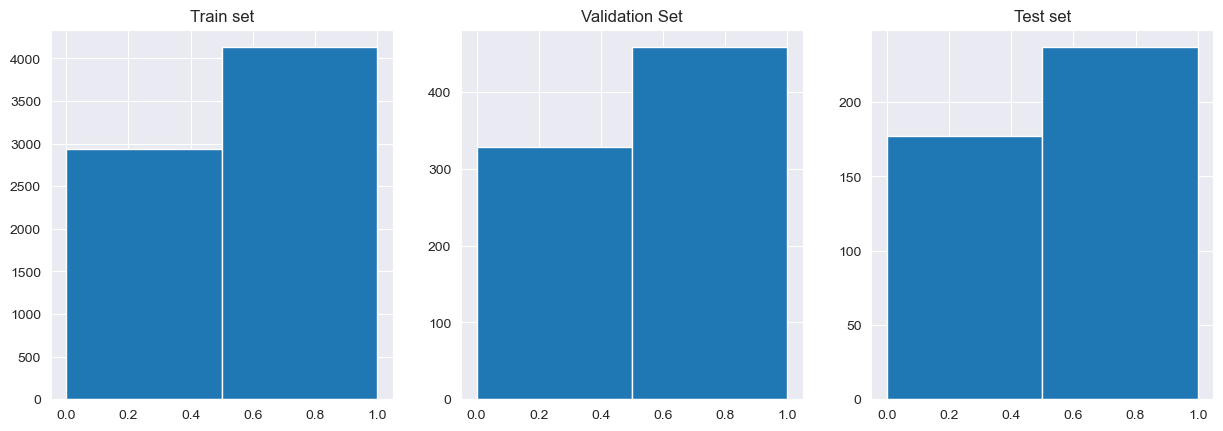

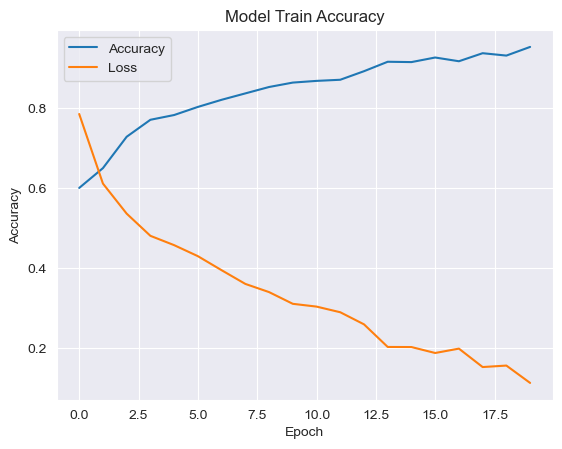

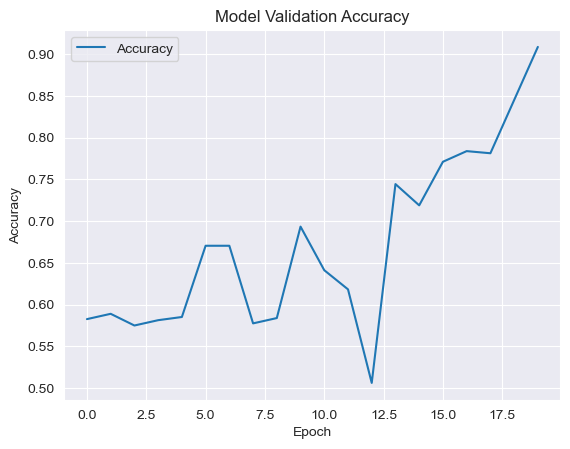

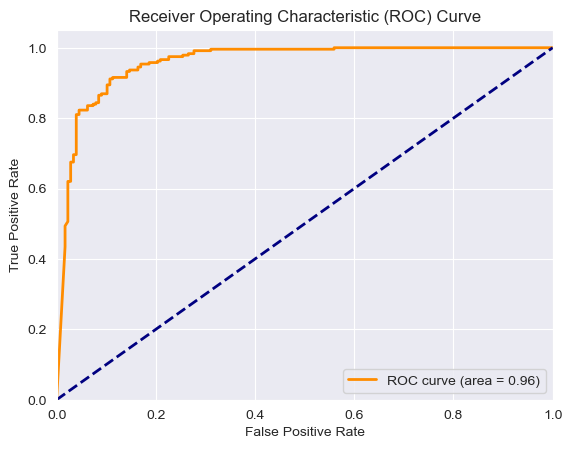

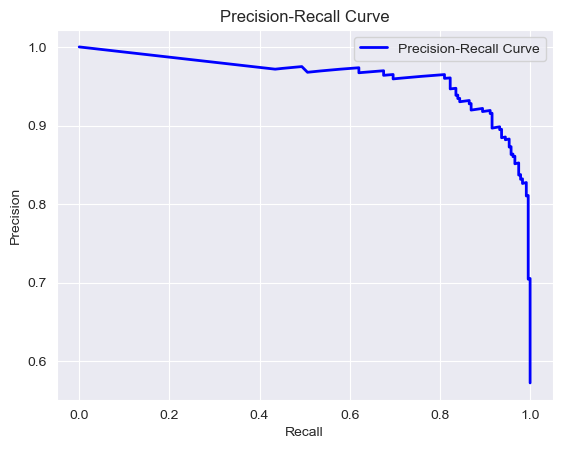

In [68]:
# test_size is percentage of the samples used for test
# valid_size is percentage of the test set used for validation
def proposed_model(batch_size, nb_epoch, learning_rate, test_size, valid_size, initializer = 'glorot_uniform', dropout = True, show_metrics=True):
  # Split data 
  [(X_train, Y_train), (X_test, Y_test), (X_valid, Y_valid)] = split_ds(samples_aug, 0.05, 0.1)
    
  # here we compile proposed model
  model = Sequential()
  model.add( Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_dim, kernel_initializer=initializer) )
  model.add(BatchNormalization())
  if dropout:
    model.add(Dropout(0.2))
  model.add( Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=initializer) )
  model.add(BatchNormalization())
  model.add( MaxPooling2D(pool_size=(2, 2)) )
  model.add( Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=initializer) )
  model.add(BatchNormalization())
  if dropout:
    model.add(Dropout(0.2))
  model.add( Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=initializer) )
  model.add(BatchNormalization())
  model.add( MaxPooling2D(pool_size=(2, 2)) )
  model.add( Flatten() )
  model.add( Dense(128, activation='relu', kernel_initializer=initializer))
  model.add(BatchNormalization())
  model.add( Dense(64, activation='relu', kernel_initializer=initializer) )
  model.add(BatchNormalization())
  if dropout:
    model.add(Dropout(0.2))
  model.add( Dense(output_dim, activation='softmax', kernel_initializer=initializer) )

  if show_metrics:
    print(model.summary())

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

  if show_metrics:
    print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())

  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose='0', validation_data=(X_valid, Y_valid))

  test_accuracy = score_table(model, X_test, Y_test)

  if show_metrics:
    plot_accuracy(history)

    Y_pred = model.predict(X_test)[:, 1]
    plot_roc_curve(Y_test[:, 1], Y_pred)

    plot_precision_recall_curve(Y_test[:, 1], Y_pred)
    
  return test_accuracy

proposed_model(
    batch_size=256,
    nb_epoch=20,
    learning_rate=0.1,
    test_size=0.1,
    valid_size=0.1
)

### Bach size Effect

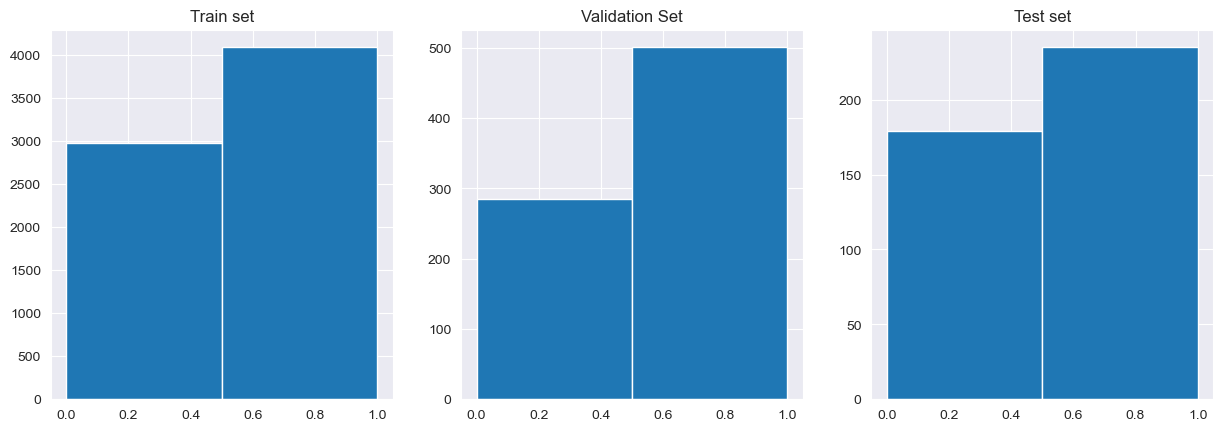

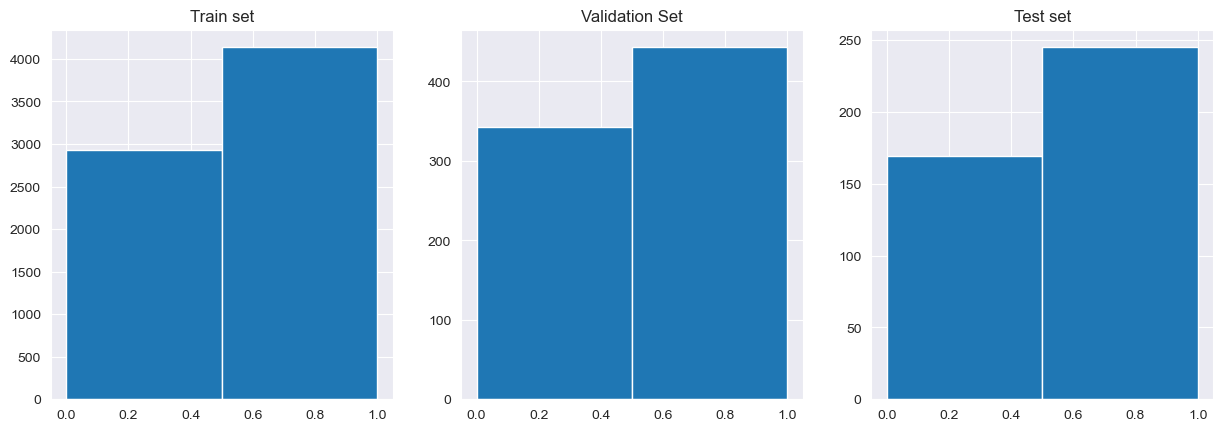

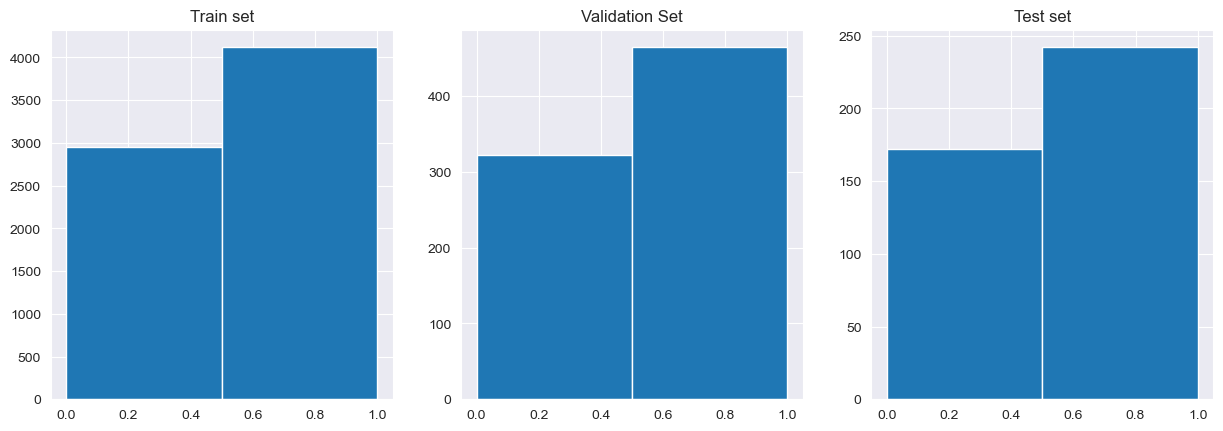

In [80]:
bach_size_values = [64, 128, 256]

def bach_size_effect():
    accuracies = []
    
    for b_size in bach_size_values:
        acc_val = proposed_model(
            batch_size=b_size,
            nb_epoch=20,
            learning_rate=0.1,
            test_size=0.1,
            valid_size=0.1,
            show_metrics = False
        )
        accuracies.append(acc_val)
        print(f"Bach size {b_size}: Done!")

    clear_output()
    return accuracies

bach_size_effect_acc = bach_size_effect()

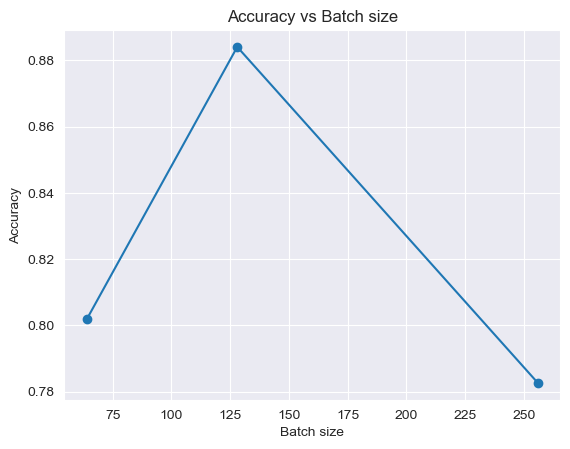

In [82]:
plot_XY_marker(bach_size_values, bach_size_effect_acc, 'Accuracy vs Batch size', 'Accuracy', 'Batch size')

### Data set split size effect

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_206 (Conv2D)         (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_311 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_147 (Dropout)       (None, 64, 64, 32)        0         
                                                                 
 conv2d_207 (Conv2D)         (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_312 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_106 (MaxPooli  (None, 32, 32, 32)     

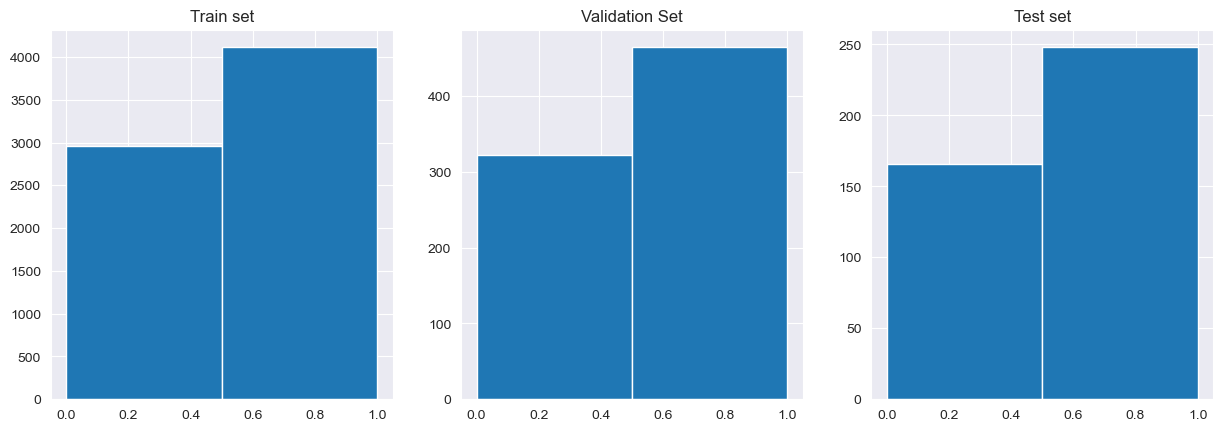

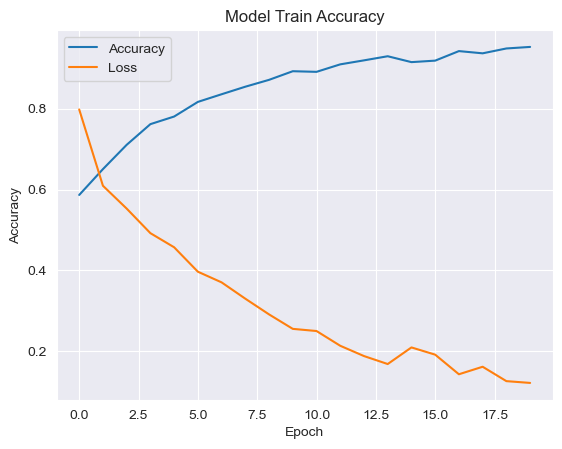

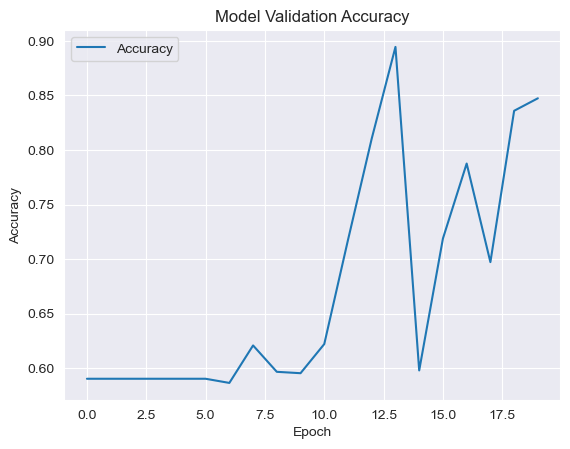

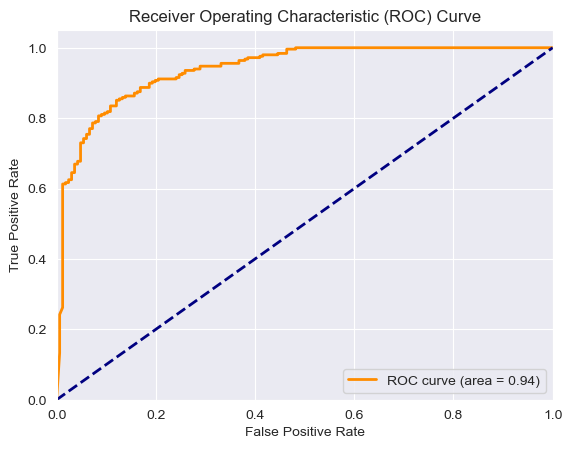

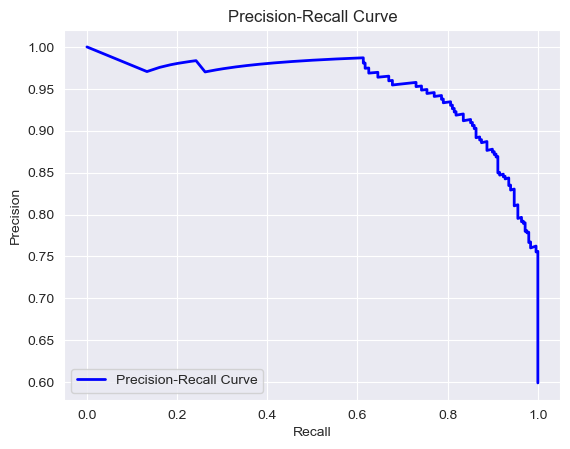

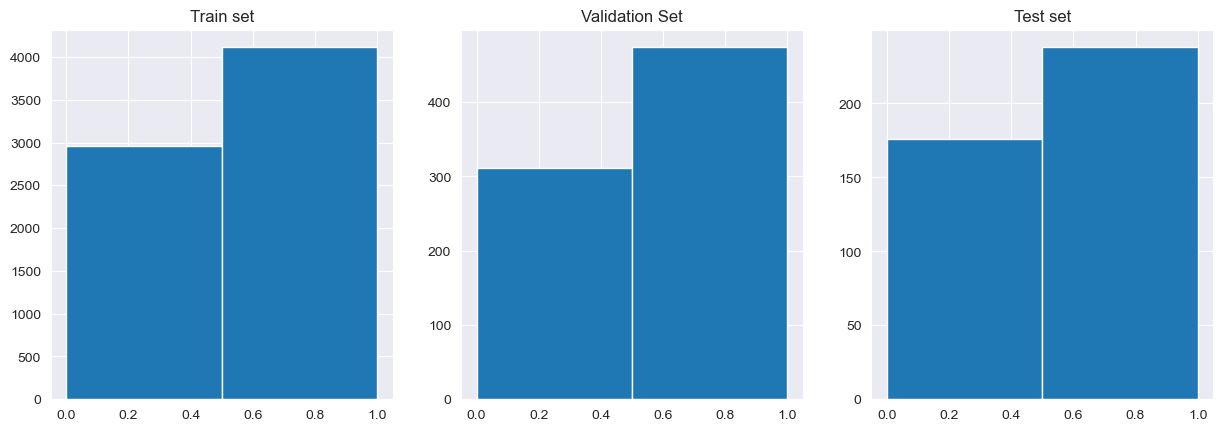

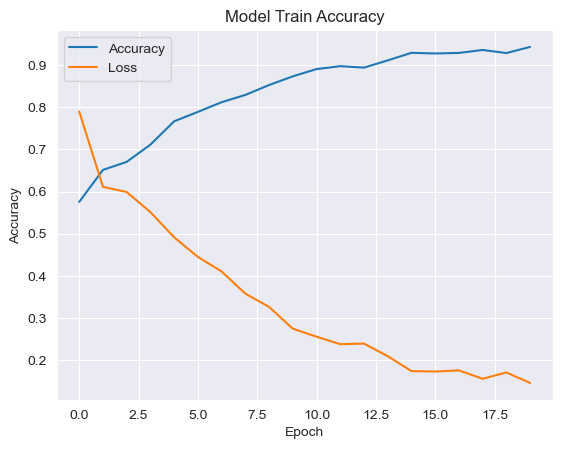

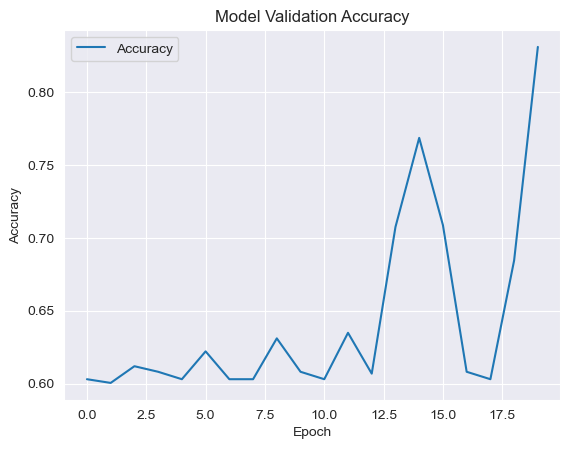

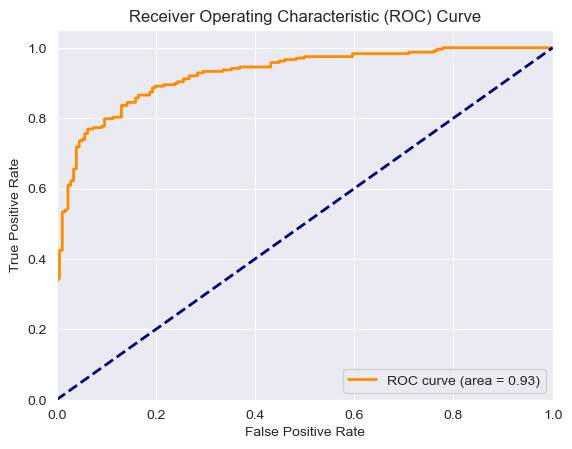

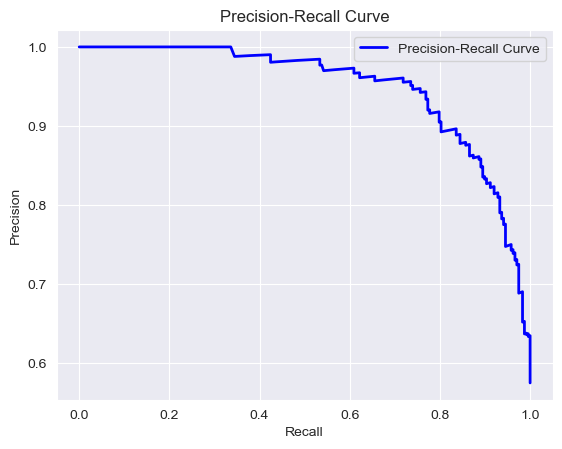

In [73]:
split_size_factors = [0.3, 0.5]

def split_size_effect():
    accuracies = []
    
    for split_factor in split_size_factors:
        acc_val = proposed_model(
            batch_size=256,
            nb_epoch=20,
            learning_rate=0.1,
            test_size=split_factor,
            valid_size=0.1,
            show_metrics = True
        )
        accuracies.append(acc_val)
        print(f"Split factor {split_factor}: Done!")

    return accuracies

split_size_effect_acc = split_size_effect()

### Dropout effect

<Model With dropout>
Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_214 (Conv2D)         (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_323 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_153 (Dropout)       (None, 64, 64, 32)        0         
                                                                 
 conv2d_215 (Conv2D)         (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_324 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_110 (MaxPooli  (N

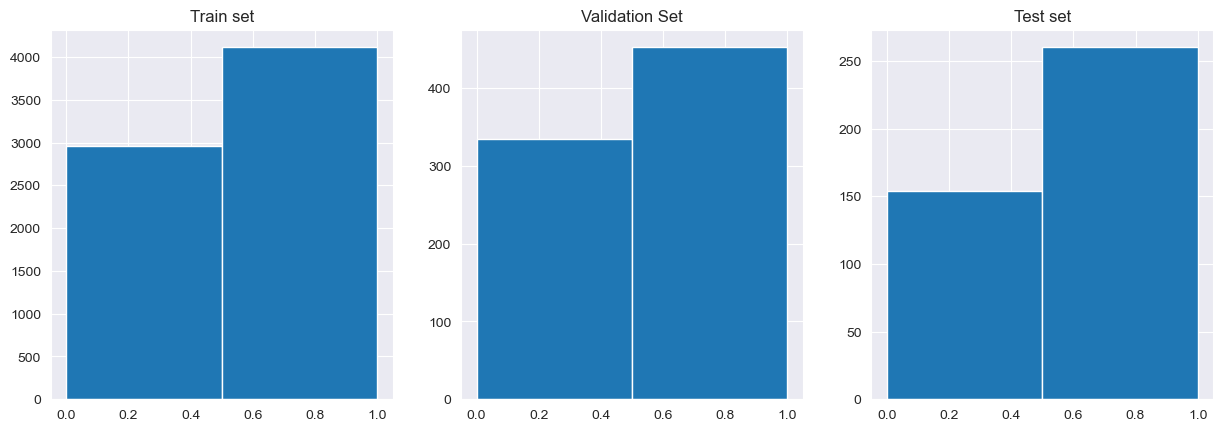

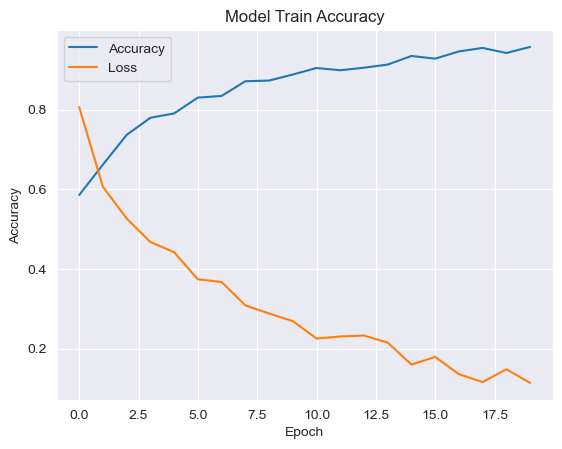

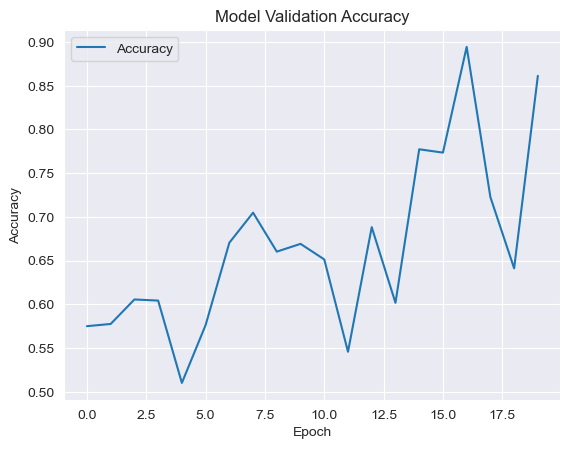

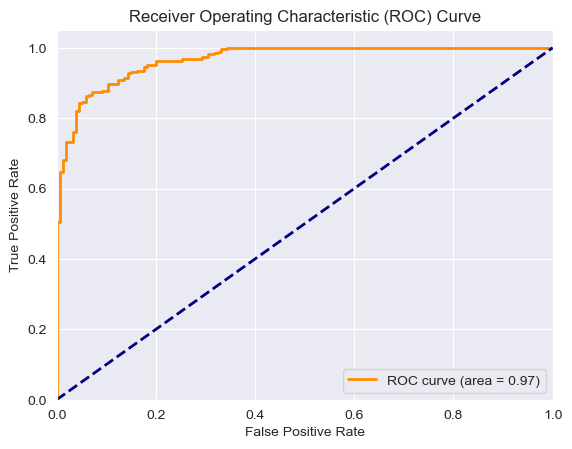

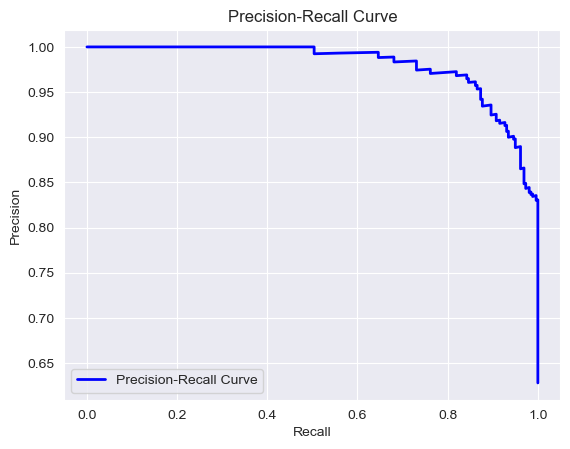

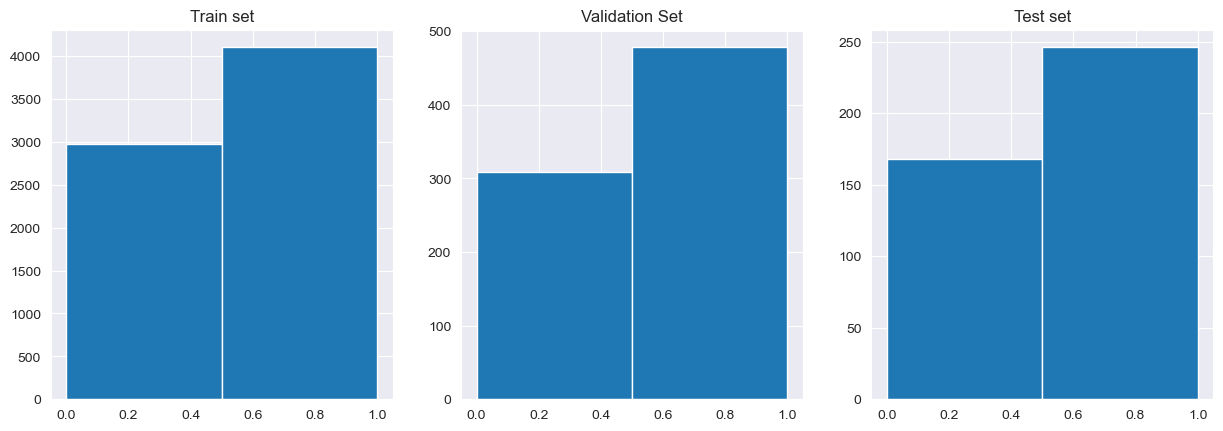

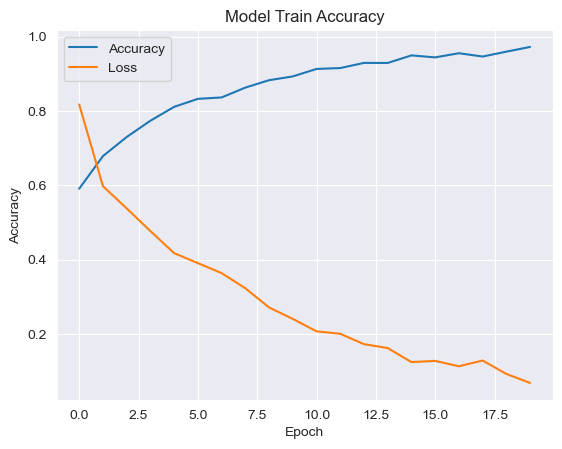

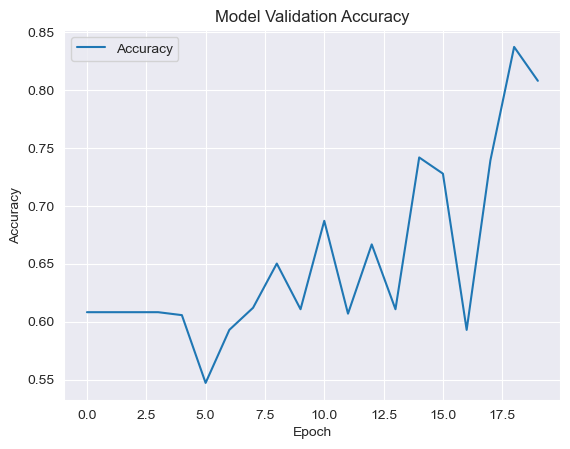

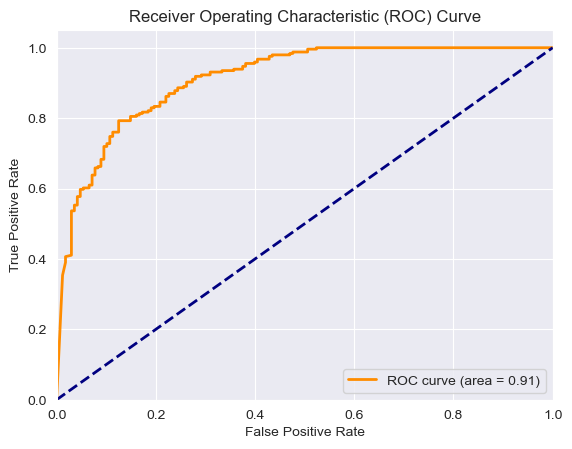

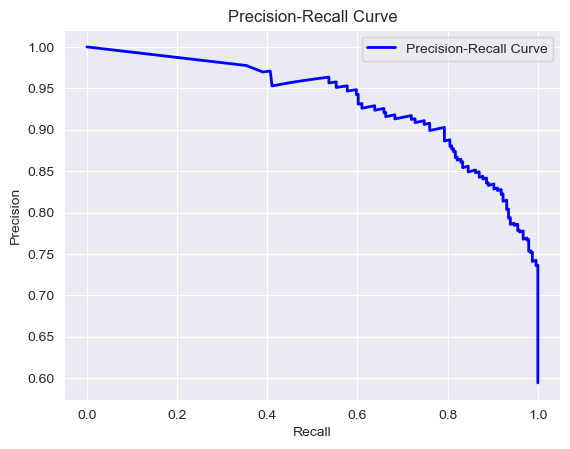

In [74]:
def dropout_effect():
    droputs = [True, False]
    accuracies = []
    
    for droput_val in droputs:
        if droput_val:
            print("<Model With dropout>")
        else:
            print("<Model Without dropout>")
        
        acc_val = proposed_model(
            batch_size=256,
            nb_epoch=20,
            learning_rate=0.1,
            test_size=0.1,
            valid_size=0.1,
            show_metrics = True,
            dropout = droput_val
        )
        accuracies.append(acc_val)
        
    return accuracies

dropout_effect_acc = dropout_effect()

### Initializer effect

Using zeros Initializer
Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_344 (Conv2D)         (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_520 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_243 (Dropout)       (None, 64, 64, 32)        0         
                                                                 
 conv2d_345 (Conv2D)         (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_521 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_176 (MaxPooli 

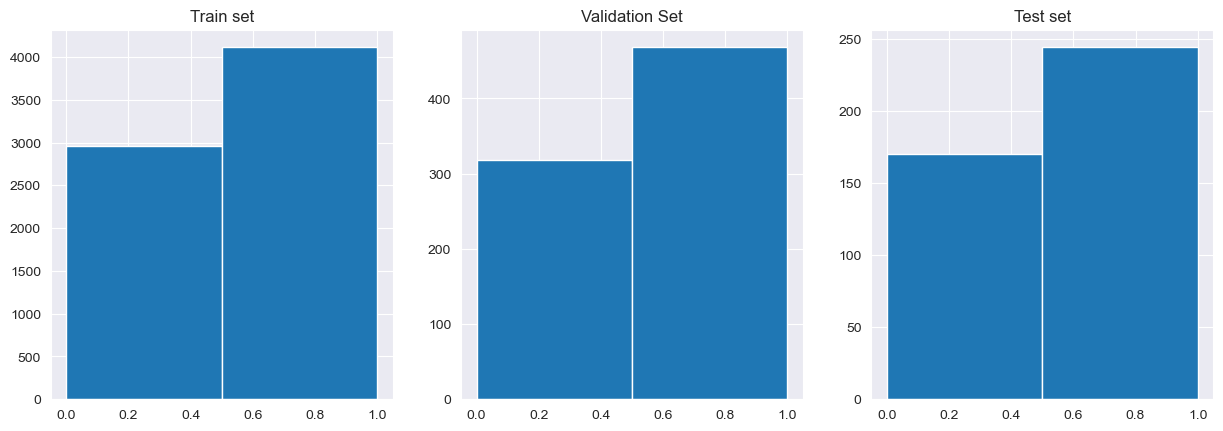

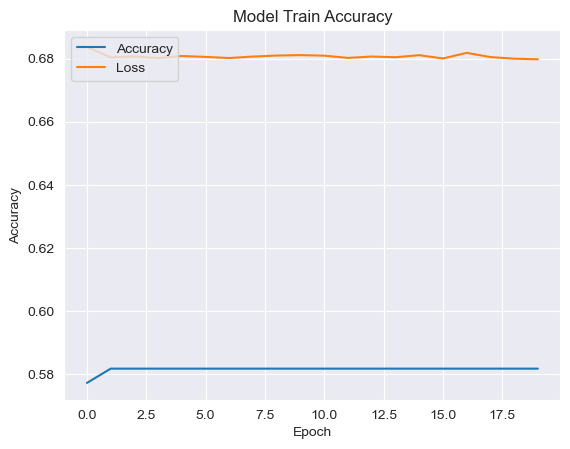

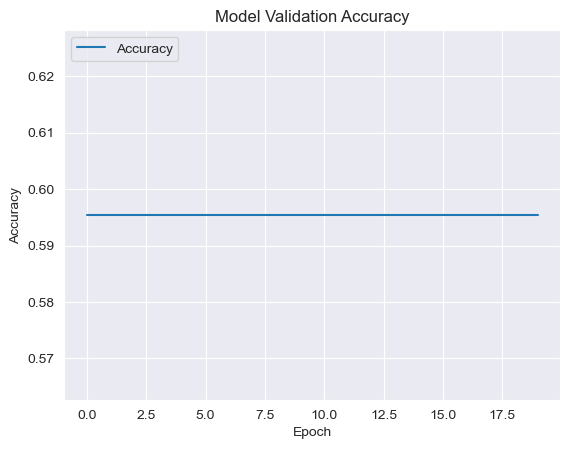

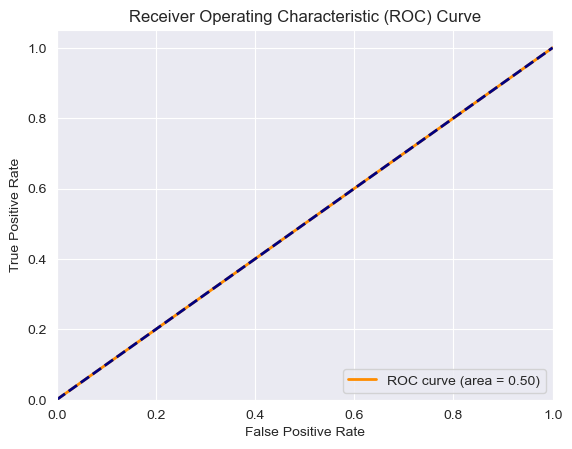

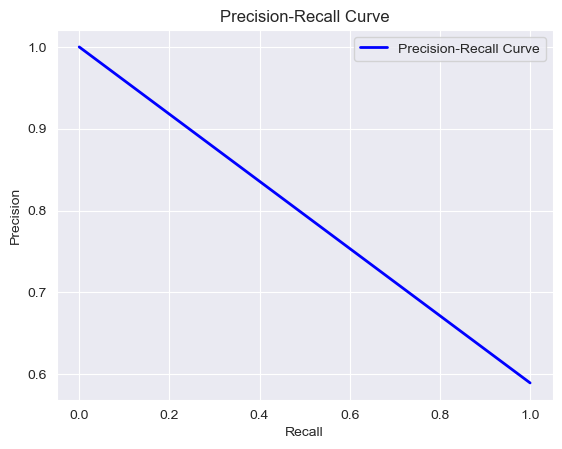

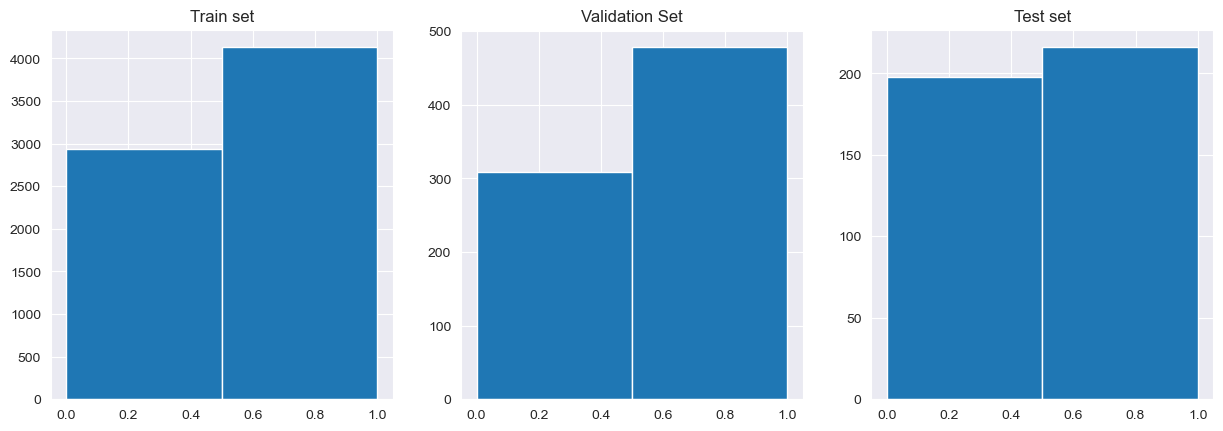

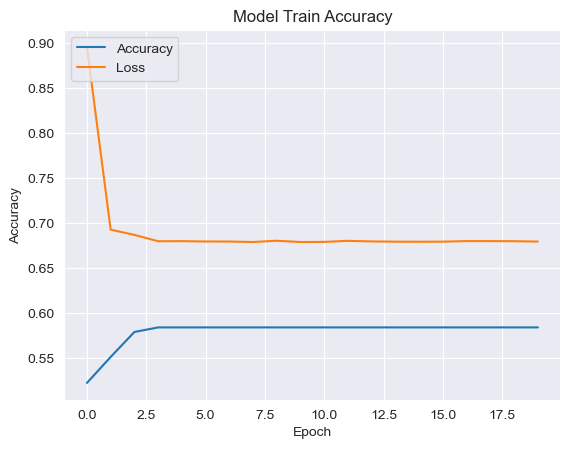

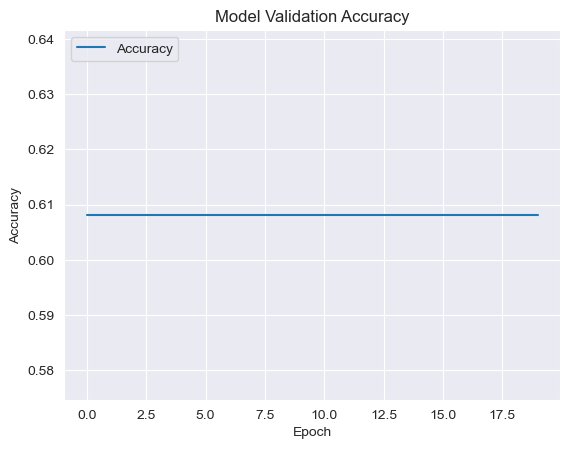

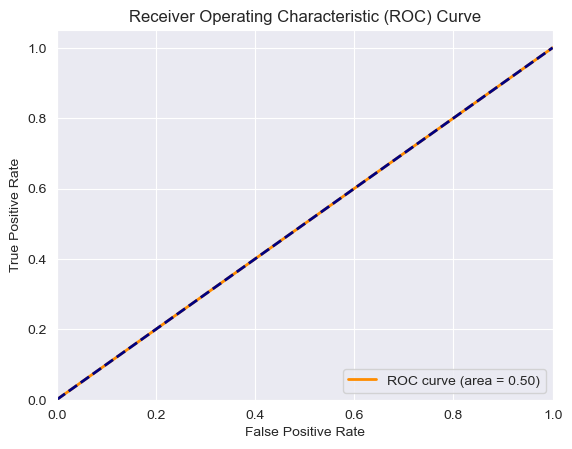

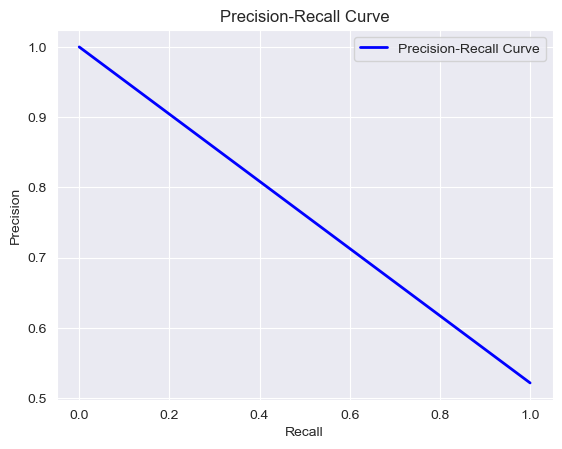

In [94]:
def init_effect():
    initializers = ['zeros', 'ones']
    accuracies = []
    
    for init_func in initializers:
        print(f"Using {init_func} Initializer")
        acc_val = proposed_model(
            batch_size=256,
            nb_epoch=20,
            learning_rate=0.1,
            test_size=0.1,
            valid_size=0.1,
            show_metrics = True,
            dropout = True,
            initializer=init_func
        )
        accuracies.append(acc_val)
        
    return accuracies

init_effect_acc = init_effect()

### Learning rate effect

## Testing model 1

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_318 (Conv2D)         (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_479 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_162 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_319 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_480 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                     

0.6473429799079895

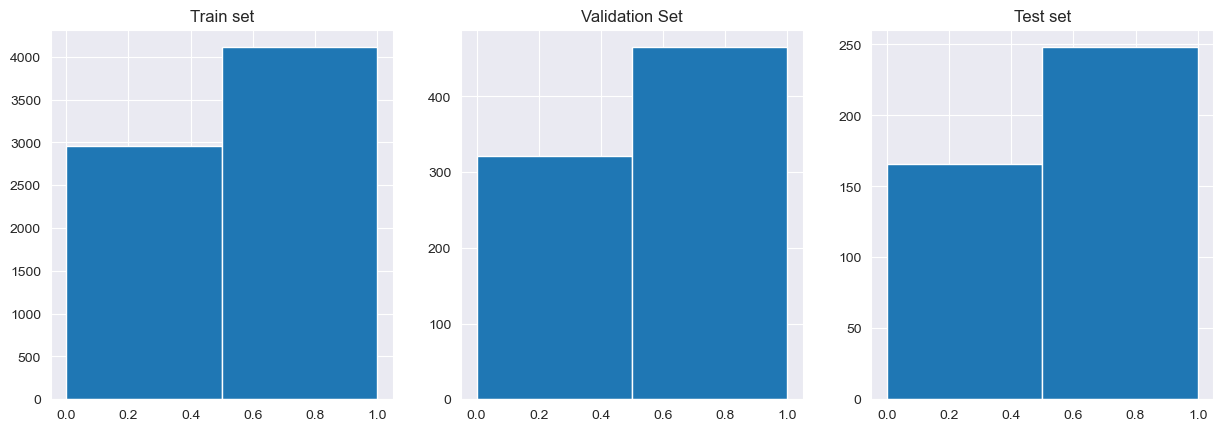

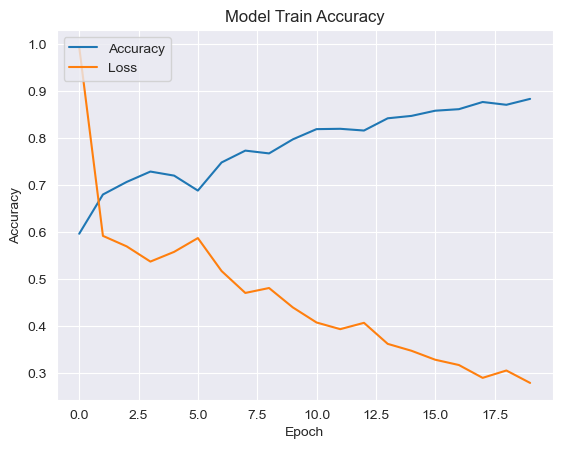

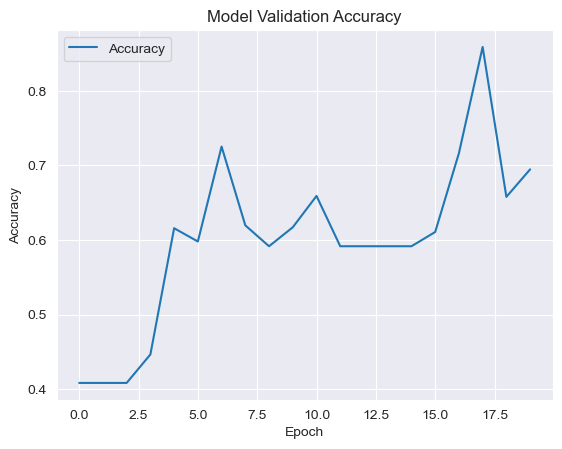

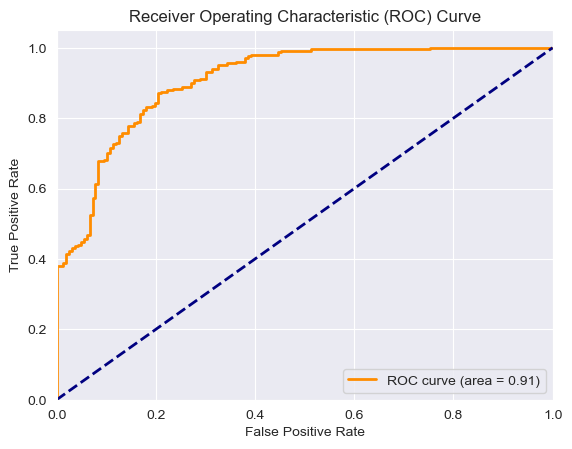

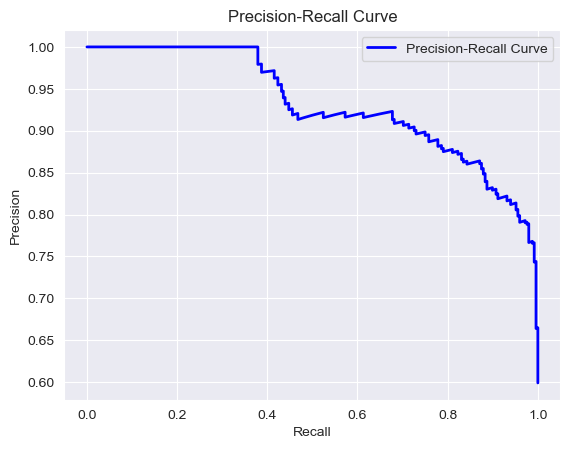

In [87]:
def testing_model_1(batch_size, nb_epoch, learning_rate, test_size, valid_size):
  # Split data 
  [(X_train, Y_train), (X_test, Y_test), (X_valid, Y_valid)] = split_ds(samples_aug, 0.05, 0.1)
    
  # here we compile testing 1 model
  model = Sequential()
  model.add( Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 1), kernel_initializer=glorot_uniform()) )
  model.add(BatchNormalization())
  model.add( MaxPooling2D(pool_size=(2, 2)) )
  model.add( Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=glorot_uniform()) )
  model.add(BatchNormalization())
  model.add( MaxPooling2D(pool_size=(2, 2)) )
  model.add( Flatten() )
  model.add( Dense(128, activation='relu', kernel_initializer=glorot_uniform()))
  model.add(BatchNormalization())
  model.add( Dense(output_dim, activation='softmax', kernel_initializer=glorot_uniform()) )

  print(model.summary())

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

  print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())

  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose='0', validation_data=(X_valid, Y_valid))

  test_accuracy = score_table(model, X_test, Y_test)

  plot_accuracy(history)
    
  Y_pred = model.predict(X_test)[:, 1]
  plot_roc_curve(Y_test[:, 1], Y_pred)

  plot_precision_recall_curve(Y_test[:, 1], Y_pred)

  return test_accuracy


testing_model_1(
    batch_size=256,
    nb_epoch=20,
    learning_rate=0.1,
    test_size=0.1,
    valid_size=0.1
)

## Testing Model 2

Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_330 (Conv2D)         (None, 64, 64, 32)        320       
                                                                 
 batch_normalization_498 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_331 (Conv2D)         (None, 64, 64, 32)        9248      
                                                                 
 batch_normalization_499 (Ba  (None, 64, 64, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_169 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                                           
                                                     

0.6449275612831116

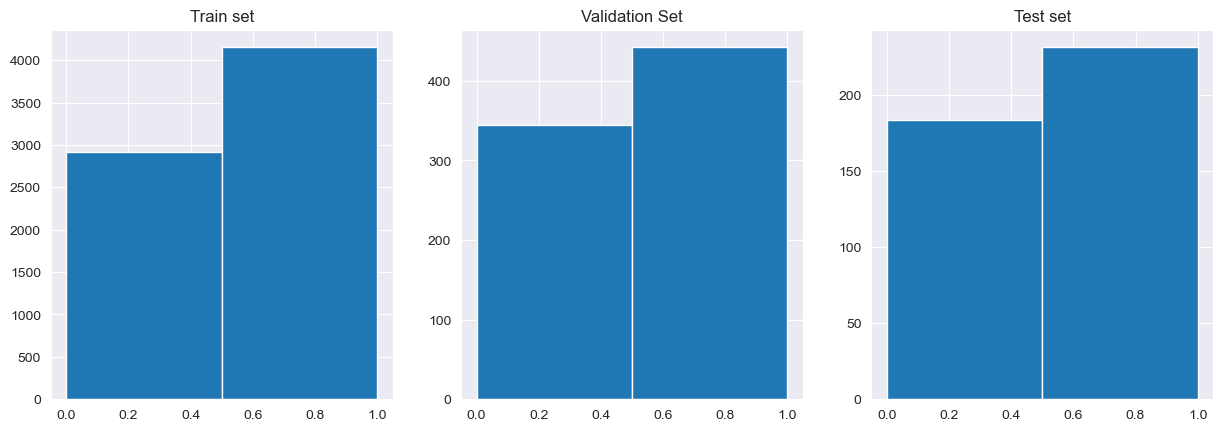

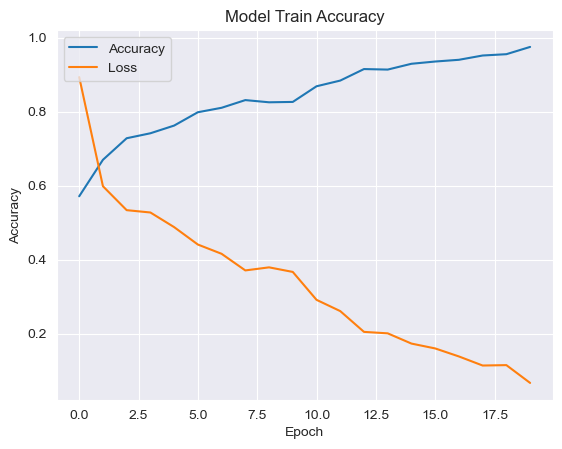

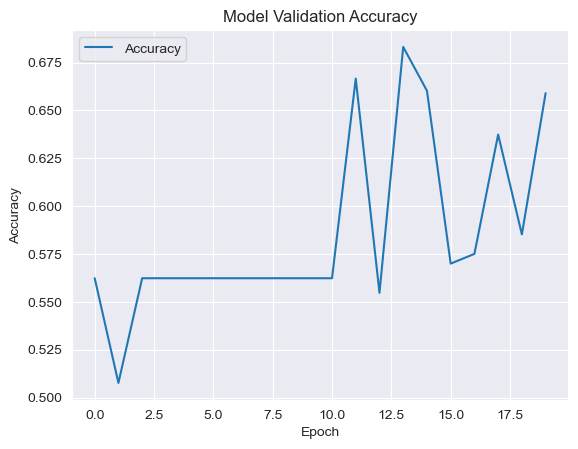

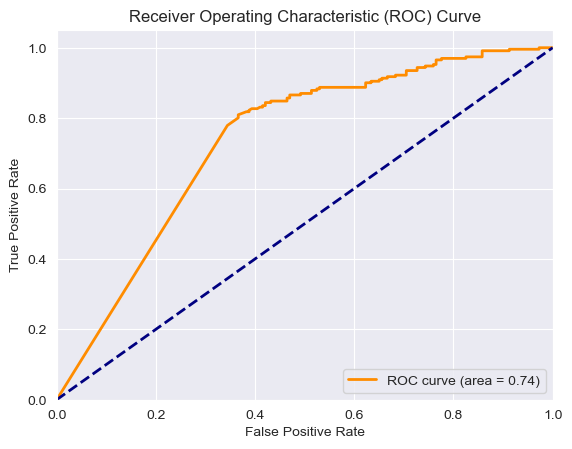

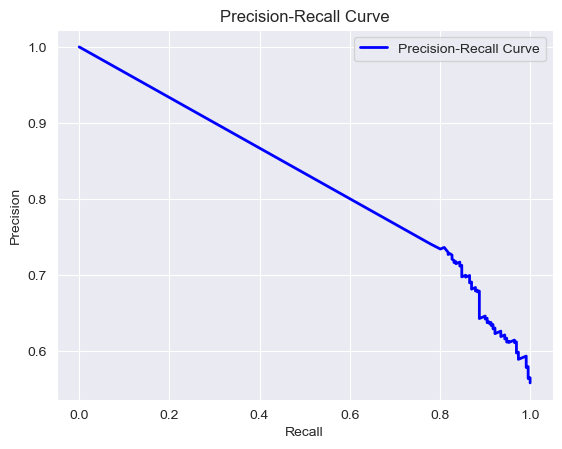

In [92]:
def testing_model_2(batch_size, nb_epoch, learning_rate, test_size, valid_size):
  # Split data 
  [(X_train, Y_train), (X_test, Y_test), (X_valid, Y_valid)] = split_ds(samples_aug, 0.05, 0.1)
    
  # here we compile testing 2 model
  model = Sequential()
  model.add( Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 1), kernel_initializer=glorot_uniform()) )
  model.add(BatchNormalization())
  model.add( Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=glorot_uniform()) )
  model.add(BatchNormalization())
  model.add( MaxPooling2D(pool_size=(2, 2)) )
  model.add( Flatten() )
  model.add( Dense(128, activation='relu', kernel_initializer=glorot_uniform()))
  model.add(BatchNormalization())
  model.add( Dense(64, activation='relu', kernel_initializer=glorot_uniform()) )
  model.add(BatchNormalization())
  model.add( Dense(output_dim, activation='softmax', kernel_initializer=glorot_uniform()) )

  print(model.summary())

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

  print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())

  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose='0', validation_data=(X_valid, Y_valid))

  test_accuracy = score_table(model, X_test, Y_test)

  plot_accuracy(history)
    
  Y_pred = model.predict(X_test)[:, 1]
  plot_roc_curve(Y_test[:, 1], Y_pred)

  plot_precision_recall_curve(Y_test[:, 1], Y_pred)

  return test_accuracy


testing_model_2(
    batch_size=256,
    nb_epoch=20,
    learning_rate=0.1,
    test_size=0.1,
    valid_size=0.1
)